# 8. Neural networks and deep learning

## 8.1 Fashion classification

Dataset:

- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:
- https://cs231n.github.io/

Clone the following GitHub repository: `git clone https://github.com/alexeygrigorev/clothing-dataset-small.git`

## 8.2 TensorFlow and Keras

- Installing TensorFlow
- Loading images

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2025-11-30 07:47:19.891283: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-30 07:47:19.915414: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-30 07:47:20.534023: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-30 07:47:22.454590: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [3]:
from tensorflow.keras.preprocessing.image import load_img

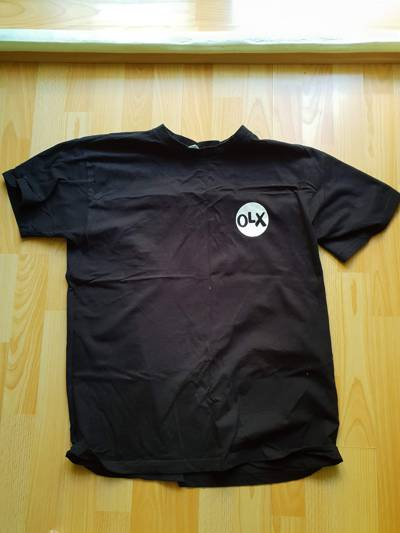

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
img = load_img(fullname, target_size=(299, 299))

In [6]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [8]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2025-11-30 07:47:23.846822: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
X = np.array([x])

In [10]:
X.shape

(1, 299, 299, 3)

In [11]:
X = preprocess_input(X)

In [12]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


In [13]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.68196315)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038140077)),
  ('n04370456', 'sweatshirt', np.float32(0.03432478)),
  ('n03710637', 'maillot', np.float32(0.011354215)),
  ('n04525038', 'velvet', np.float32(0.0018453586))]]

# 8.4 Convolutional neural networks

- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/

# 8.5 Transfer learning

- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

(Better to run it with a GPU)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [16]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [17]:
X, y = next(train_ds)

In [18]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [20]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [21]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [22]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 600ms/step - accuracy: 0.6633 - loss: 1.2802 - val_accuracy: 0.7859 - val_loss: 0.8748
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 565ms/step - accuracy: 0.8250 - loss: 0.5617 - val_accuracy: 0.7683 - val_loss: 0.9181
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 545ms/step - accuracy: 0.8716 - loss: 0.3814 - val_accuracy: 0.8065 - val_loss: 0.9481
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 547ms/step - accuracy: 0.9257 - loss: 0.2036 - val_accuracy: 0.7889 - val_loss: 0.8859
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 548ms/step - accuracy: 0.9495 - loss: 0.1441 - val_accuracy: 0.8123 - val_loss: 0.8843
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 558ms/step - accuracy: 0.9580 - loss: 0.1091 - val_accuracy: 0.8270 - val_loss: 0.8372
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 525ms/step - accuracy: 0.9635 - loss: 0.1103 - val_accuracy: 0.7830 - val_loss: 0.9405
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 541ms/step - accuracy: 0.9749 - loss: 0.0747 - val_accu

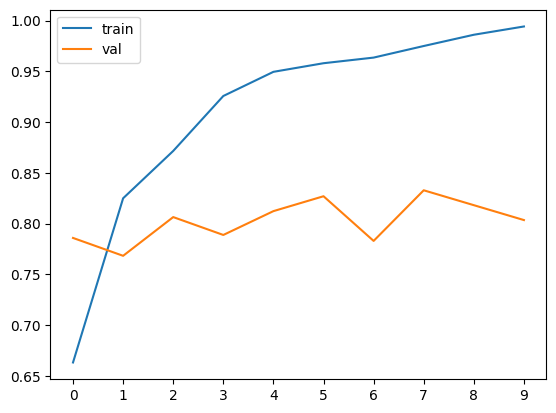

In [23]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# 8.6 Adjusting the learning rate

- What's the learning rate
- Trying different values

In [24]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [25]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 556ms/step - accuracy: 0.3667 - loss: 1.9337 - val_accuracy: 0.5073 - val_loss: 1.5980
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 535ms/step - accuracy: 0.5701 - loss: 1.3780 - val_accuracy: 0.6158 - val_loss: 1.2496
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 529ms/step - accuracy: 0.6483 - loss: 1.1401 - val_accuracy: 0.6716 - val_loss: 1.0674
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 49s 512ms/step - accuracy: 0.6952 - loss: 1.0016 - val_accuracy: 0.7038 - val_loss: 0.9600
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 532ms/step - accuracy: 0.7190 - loss: 0.9105 - val_accuracy: 0.7390 - val_loss: 0.8822
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 533ms/step - accuracy: 0.7373 - loss: 0.8427 - val_accuracy: 0.7449 - val_loss: 0.8308
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 520ms/step - accuracy: 0.7484 - loss: 0.7906 - val_accuracy: 0.7449 - val_loss: 0.7898
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 523ms/step - accuracy: 0.7568 - loss: 0.7478 - v

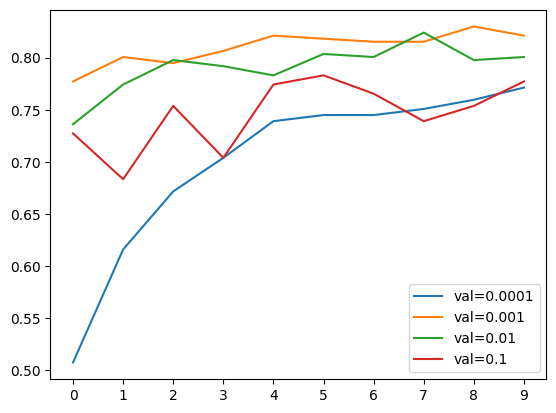

In [26]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [27]:
learning_rate = 0.001

# 8.7 Checkpointing

- Saving the best model only
- Training a model with callbacks

In [28]:
model.save_weights('model_v1.weights.h5')

In [29]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [30]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.5410 - loss: 1.3930

96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 516ms/step - accuracy: 0.6415 - loss: 1.0617 - val_accuracy: 0.7713 - val_loss: 0.7080
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.7997 - loss: 0.6361

96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 494ms/step - accuracy: 0.7907 - loss: 0.6243 - val_accuracy: 0.8035 - val_loss: 0.6276
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 485ms/step - accuracy: 0.8357 - loss: 0.5025 - val_accuracy: 0.8006 - val_loss: 0.5989
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.8736 - loss: 0.4133

96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 496ms/step - accuracy: 0.8657 - loss: 0.4212 - val_accuracy: 0.8123 - val_loss: 0.5822
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8882 - loss: 0.3683

96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 452ms/step - accuracy: 0.8898 - loss: 0.3677 - val_accuracy: 0.8270 - val_loss: 0.5585
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 494ms/step - accuracy: 0.9100 - loss: 0.3192 - val_accuracy: 0.8240 - val_loss: 0.5382
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 488ms/step - accuracy: 0.9198 - loss: 0.2868 - val_accuracy: 0.8270 - val_loss: 0.5371
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.9303 - loss: 0.2669

96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 494ms/step - accuracy: 0.9351 - loss: 0.2576 - val_accuracy: 0.8299 - val_loss: 0.5300
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 492ms/step - accuracy: 0.9465 - loss: 0.2283 - val_accuracy: 0.8094 - val_loss: 0.5570
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 491ms/step - accuracy: 0.9531 - loss: 0.2104 - val_accuracy: 0.8299 - val_loss: 0.5362


# 8.8 Adding more layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [31]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [32]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 495ms/step - accuracy: 0.5199 - loss: 1.5203 - val_accuracy: 0.6833 - val_loss: 1.0933
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 488ms/step - accuracy: 0.7154 - loss: 0.8751 - val_accuracy: 0.7683 - val_loss: 0.7730
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 486ms/step - accuracy: 0.7907 - loss: 0.6325 - val_accuracy: 0.7713 - val_loss: 0.6858
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 485ms/step - accuracy: 0.8259 - loss: 0.5127 - val_accuracy: 0.8065 - val_loss: 0.6328
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 46s 484ms/step - accuracy: 0.8618 - loss: 0.4338 - val_accuracy: 0.8123 - val_loss: 0.6154
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 491ms/step - accuracy: 0.8849 - loss: 0.3727 - val_accuracy: 0.8328 - val_loss: 0.5636
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 486ms/step - accuracy: 0.9055 - loss: 0.3213 - val_accuracy: 0.8035 - val_loss: 0.5757
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 485ms/step - accuracy: 0.9146 - loss: 0.2832 - val_a

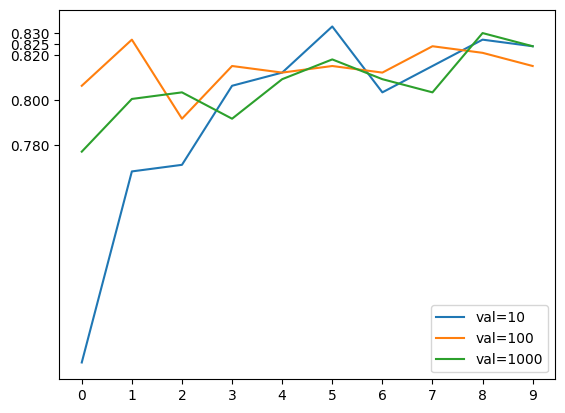

In [33]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

# 8.9 Regularization and dropout

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [34]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [35]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 506ms/step - accuracy: 0.6731 - loss: 0.9477 - val_accuracy: 0.7889 - val_loss: 0.6284
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 491ms/step - accuracy: 0.8191 - loss: 0.5156 - val_accuracy: 0.8035 - val_loss: 0.5965
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 494ms/step - accuracy: 0.8794 - loss: 0.3607 - val_accuracy: 0.8182 - val_loss: 0.5626
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 489ms/step - accuracy: 0.9156 - loss: 0.2637 - val_accuracy: 0.8240 - val_loss: 0.5963
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 487ms/step - accuracy: 0.9534 - loss: 0.1788 - val_accuracy: 0.8035 - val_loss: 0.5901
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 501ms/step - accuracy: 0.9684 - loss: 0.1319 - val_accuracy: 0.7977 - val_loss: 0.6079
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 491ms/step - accuracy: 0.9837 - loss: 0.0914 - val_accuracy: 0.8123 - val_loss: 0.6124
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 492ms/step - accuracy: 0.9925 - loss: 0.0628 - val_

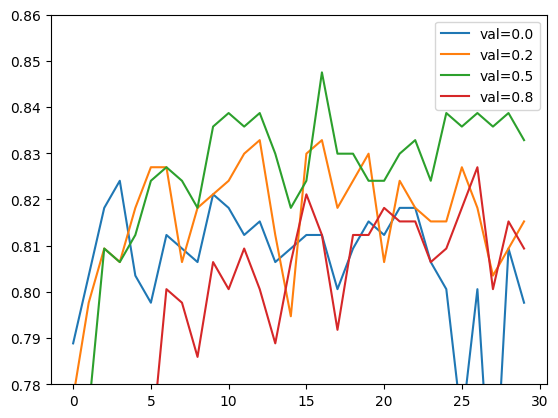

In [36]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

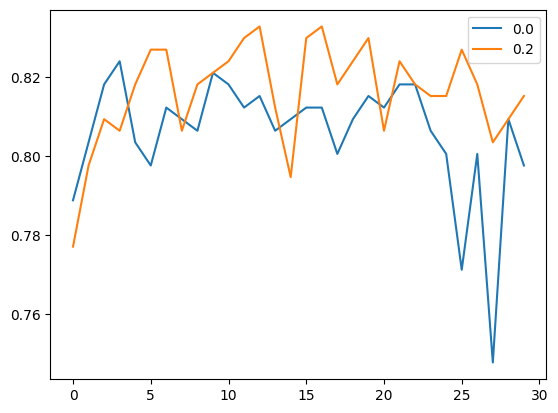

In [37]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

# 8.10 Data augmentation

- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?

In [38]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [39]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 493ms/step - accuracy: 0.6291 - loss: 1.0796 - val_accuracy: 0.7683 - val_loss: 0.7232
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 495ms/step - accuracy: 0.7764 - loss: 0.6348 - val_accuracy: 0.7918 - val_loss: 0.6182
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 493ms/step - accuracy: 0.8351 - loss: 0.4806 - val_accuracy: 0.8065 - val_loss: 0.5936
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 498ms/step - accuracy: 0.8722 - loss: 0.3700 - val_accuracy: 0.8006 - val_loss: 0.6047
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 497ms/step - accuracy: 0.8996 - loss: 0.2954 - val_accuracy: 0.8270 - val_loss: 0.5633
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 488ms/step - accuracy: 0.9218 - loss: 0.2370 - val_accuracy: 0.8035 - val_loss: 0.5965
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 497ms/step - accuracy: 0.9459 - loss: 0.1879 - val_accuracy: 0.8240 - val_loss: 0.5535
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 497ms/step - accuracy: 0.9537 - loss: 0.1554 - val_accu

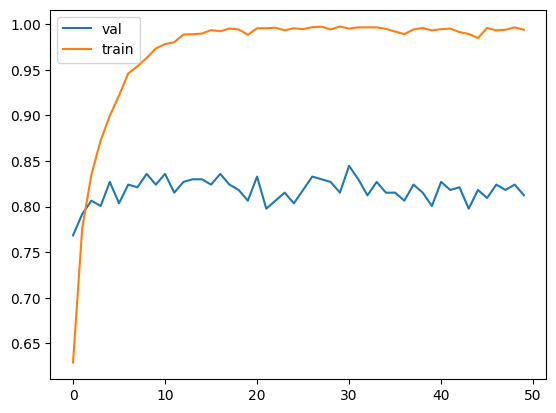

In [40]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# 8.11 Training a larger model

- Train a 299x299 model

In [41]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [42]:
input_size = 299

In [43]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [44]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [45]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5554 - loss: 1.4239

96/96 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6819 - loss: 1.0175 - val_accuracy: 0.8299 - val_loss: 0.5684
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8080 - loss: 0.5747

96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.8217 - loss: 0.5301 - val_accuracy: 0.8475 - val_loss: 0.4671
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8525 - loss: 0.4332

96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.8540 - loss: 0.4345 - val_accuracy: 0.8710 - val_loss: 0.4123
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.8654 - loss: 0.3825 - val_accuracy: 0.8622 - val_loss: 0.3687
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.8765 - loss: 0.3473 - val_accuracy: 0.8680 - val_loss: 0.3840
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.8905 - loss: 0.3190 - val_accuracy: 0.8622 - val_loss: 0.4027
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8883 - loss: 0.3131

96/96 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.8967 - loss: 0.3008 - val_accuracy: 0.8739 - val_loss: 0.3620
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9071 - loss: 0.2786

96/96 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9042 - loss: 0.2762 - val_accuracy: 0.8768 - val_loss: 0.3612
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9133 - loss: 0.2572 - val_accuracy: 0.8768 - val_loss: 0.3655
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9136 - loss: 0.2505 - val_accuracy: 0.8622 - val_loss: 0.3810
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9195 - loss: 0.2297

96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9175 - loss: 0.2333 - val_accuracy: 0.8798 - val_loss: 0.3700
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9273 - loss: 0.2166 - val_accuracy: 0.8651 - val_loss: 0.3872
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9362 - loss: 0.2037

96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9332 - loss: 0.2094 - val_accuracy: 0.8827 - val_loss: 0.3519
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9319 - loss: 0.1975 - val_accuracy: 0.8827 - val_loss: 0.3659
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9368 - loss: 0.1930 - val_accuracy: 0.8798 - val_loss: 0.3628
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9472 - loss: 0.1694 - val_accuracy: 0.8798 - val_loss: 0.3751
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9495 - loss: 0.1506

96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9443 - loss: 0.1627 - val_accuracy: 0.8944 - val_loss: 0.3476
Epoch 18/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9508 - loss: 0.1583 - val_accuracy: 0.8886 - val_loss: 0.3340
Epoch 19/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9498 - loss: 0.1524 - val_accuracy: 0.8915 - val_loss: 0.3554
Epoch 20/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9573 - loss: 0.1409 - val_accuracy: 0.8886 - val_loss: 0.3550
Epoch 21/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9550 - loss: 0.1377 - val_accuracy: 0.8856 - val_loss: 0.3897
Epoch 22/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9547 - loss: 0.1373 - val_accuracy: 0.8622 - val_loss: 0.3826
Epoch 23/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9586 - loss: 0.1309 - val_accuracy: 0.8915 - val_loss: 0.3632
Epoch 24/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9638 - loss: 0.1175 - val_accuracy: 0.8856 - val_l

96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9619 - loss: 0.1131 - val_accuracy: 0.8974 - val_loss: 0.3687
Epoch 29/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9700 - loss: 0.0981 - val_accuracy: 0.8768 - val_loss: 0.3790
Epoch 30/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9697 - loss: 0.0965 - val_accuracy: 0.8680 - val_loss: 0.4190
Epoch 31/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9723 - loss: 0.0938 - val_accuracy: 0.8944 - val_loss: 0.3867
Epoch 32/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9759 - loss: 0.0855 - val_accuracy: 0.8622 - val_loss: 0.4250
Epoch 33/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9746 - loss: 0.0851 - val_accuracy: 0.8827 - val_loss: 0.4207
Epoch 34/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9795 - loss: 0.0781 - val_accuracy: 0.8944 - val_loss: 0.3921
Epoch 35/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9716 - loss: 0.0893 - val_accuracy: 0.8768 - val_l

96/96 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.9827 - loss: 0.0646 - val_accuracy: 0.9003 - val_loss: 0.3744
Epoch 40/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.9827 - loss: 0.0613 - val_accuracy: 0.8856 - val_loss: 0.4036
Epoch 41/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9788 - loss: 0.0685 - val_accuracy: 0.8651 - val_loss: 0.4583
Epoch 42/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9804 - loss: 0.0610 - val_accuracy: 0.8915 - val_loss: 0.4311
Epoch 43/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9847 - loss: 0.0587 - val_accuracy: 0.8739 - val_loss: 0.4324
Epoch 44/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9847 - loss: 0.0575 - val_accuracy: 0.8768 - val_loss: 0.4177
Epoch 45/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9827 - loss: 0.0564 - val_accuracy: 0.8710 - val_loss: 0.4938
Epoch 46/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9850 - loss: 0.0512 - val_accuracy: 0.8886 - val_l

96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9879 - loss: 0.0468 - val_accuracy: 0.9062 - val_loss: 0.3883
Epoch 49/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9853 - loss: 0.0543 - val_accuracy: 0.8680 - val_loss: 0.4439
Epoch 50/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9876 - loss: 0.0464 - val_accuracy: 0.8856 - val_loss: 0.4209


# 8.12 Using the model

- Loading the model
- Evaluating the model
- Getting predictions

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [48]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [50]:
model = keras.models.load_model('xception_v4_1_48_0.906.h5')

In [51]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9086 - loss: 0.2992


[0.29919782280921936, 0.9086021780967712]

In [52]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [53]:
img = load_img(path, target_size=(299, 299))

In [55]:
import numpy as np

In [56]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [57]:
X = preprocess_input(X)

In [58]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


In [59]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [60]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-4.6997347),
 'hat': np.float32(-4.1879025),
 'longsleeve': np.float32(-1.9282681),
 'outwear': np.float32(-3.6330957),
 'pants': np.float32(12.102629),
 'shirt': np.float32(-5.7978573),
 'shoes': np.float32(-3.5865347),
 'shorts': np.float32(2.9219365),
 'skirt': np.float32(-7.051541),
 't-shirt': np.float32(-5.9568033)}

# 8.13 Summary

- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trians. Fast learners aren't always best ones
- We can save the best model using callbacks and checkpointing
- To avoid overfitting, use dropout and augmentation

# 8.14 Explore more

- Add more data, e.g. Zalando, etc (ADD LINKS)
- Albumentations - another way of generating augmentations
- Use PyTorch or MXNet instead of TensorFlow/Keras
- In addition to Xception, there are others architectures - try them

Other projects:

- cats vs dogs
- Hotdog vs not hotdog
- Category of images